Neural Networks using Gradient Descent Algorithm

Data set used: https://www.kaggle.com/tongpython/cat-and-dog

In [1]:
#libraries used
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas as pd
import os
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_cat ='../input/training_set/training_set/cats'
train_dog ='../input/training_set/training_set/dogs'

In [3]:
#Reading dataset
image_names = []
data_labels = []
data_images = []
size = 64,64
def image_read(file1,target_class):
        for file in os.listdir(file1):
            if file.endswith("jpg"):
                image_names.append(os.path.join(file1,file))
                data_labels.append(target_class)
                img = cv2.imread(os.path.join(file1,file))
                im = cv2.resize(img,size)
                data_images.append(im)
            else:
                continue
    

image_read(train_cat,0)     
image_read(train_dog,1)
data = np.array(data_images)

In [4]:
data.shape

(8005, 64, 64, 3)

CAT Image Samples


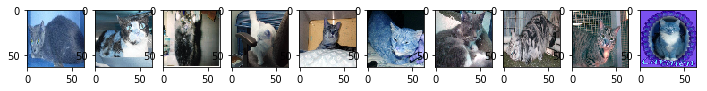

In [5]:
#preview images
plt.figure(figsize=(12,10))
x, y = 10, 1
print("CAT Image Samples")
for i in range(0,10):  
    plt.subplot(y, x, i+1)
    plt.imshow(data[i].reshape((64,64,3)),interpolation='nearest',cmap='Greys')
plt.show()

DOG Image Samples


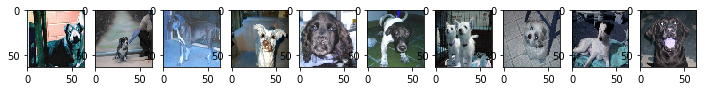

In [6]:
#preview images
plt.figure(figsize=(12,10))
x, y = 10, 1
print("DOG Image Samples")
for i in range(0,10):  
    plt.subplot(y, x, i+1)
    plt.imshow(data[i+4000].reshape((64,64,3)),interpolation='nearest',cmap='Greys')
plt.show()

In [7]:
#class label
print("cat -> 0")
print("Dog -> 1")

cat -> 0
Dog -> 1


In [8]:
train_flatten = data.reshape(data.shape[0], -1).T 
data_final=pd.DataFrame((train_flatten)/255).T

In [9]:
def sigmoid(s):
     k1=1 / (1 + np.exp(-s))
     k=np.array(k1)
     return(k1)

def relu(s):
    s[s<0]=0
    return s
def derivative_relu(s):
    s[s<0]=0
    s[s>=0]=1
    return(s)


In [10]:
#Random initialisations of input weights
def initialisation(node_list):
    parameter_w={}
    parameter_b={}
    length = len(node_list)  
    for l in range(1,length):
        parameter_w[l] = np.random.randn(node_list[l], node_list[l-1]) /100
        parameter_b[l] = np.zeros((node_list[l], 1))
    return(parameter_w,parameter_b)


In [11]:
#forward propagation
def forward_prop(x1,w,b):
    a=[]
    z=[]
    x=x1.T
    a.append(x)
    no_of_layers=len(w)
    z.append(0)
    for i in range(1,no_of_layers+1):
        z.append(np.dot(w[i],a[i-1]) + b[i])
        if(i==no_of_layers):
            a.append(sigmoid(z[i]))
        else:
            a.append(relu(z[i]))
        
    return a,z

In [12]:
#back propagation
def backprob(w,b,a,z,target,m,alpha):
    no_of_layers=len(w)
    dz=[0]*(no_of_layers+1)
    db=[0]*(no_of_layers+1)
    dw=[0]*(no_of_layers+1)
    dz[no_of_layers]=a[no_of_layers]-target
    dw[no_of_layers]=np.dot(dz[no_of_layers],(a[no_of_layers-1].T))/m
    db[no_of_layers]=(1/m)*np.sum(dz[no_of_layers],axis=1,keepdims=True)
    for i in range(no_of_layers-1,0,-1):
        dz[i]=np.multiply(np.dot(w[i+1].T,dz[i+1]),derivative_relu(z[i]))
        dw[i]=np.dot(dz[i],(a[i-1].T))*(1/m)
        db[i]=(1/m)*np.sum(dz[i],axis=1,keepdims=True)
    for i in range(1,len(w)+1):
        w[i]=w[i]-(alpha*dw[i])
        b[i]=b[i]-(alpha*db[i])
    return(w,b)

In [13]:
#hyper parameters
alpha=0.01
no_of_iterations=20

In [14]:
#main program
target=np.array(data_labels).T
m=len(target)
cost1=[]
w,b=initialisation([12288,10000,5000,1000,1])

In [15]:
print("Training")
for i in range(1,no_of_iterations):
    a,z=forward_prop(data_final,w,b)
    yhat=(a[len(a)-1])
    cost1.append( (-1 / m) * np.sum(np.multiply(target, np.log(yhat)) + np.multiply(1 - target, np.log(1 - yhat))))
    w,b=backprob(w,b,a,z,target,m,alpha)
    print("Iteration= ",i,"  Cost= ",cost1[-1])

Training
Iteration=  1   Cost=  0.6938047494560645
Iteration=  2   Cost=  0.693588902631989
Iteration=  3   Cost=  0.6934282752637885
Iteration=  4   Cost=  0.6933054427081818
Iteration=  5   Cost=  0.6932085530259906
Iteration=  6   Cost=  0.6931292601821717
Iteration=  7   Cost=  0.6930617906462199
Iteration=  8   Cost=  0.6930024647063512
Iteration=  9   Cost=  0.6929487685249773
Iteration=  10   Cost=  0.6928988817228274
Iteration=  11   Cost=  0.6928515578484455
Iteration=  12   Cost=  0.6928059919298959
Iteration=  13   Cost=  0.6927616674988375
Iteration=  14   Cost=  0.692718236240146
Iteration=  15   Cost=  0.6926754384808727
Iteration=  16   Cost=  0.6926330748201549
Iteration=  17   Cost=  0.6925910458002724
Iteration=  18   Cost=  0.6925492979715813
Iteration=  19   Cost=  0.6925077731654535


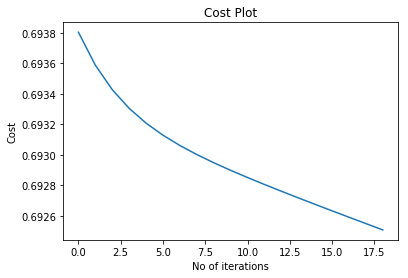

In [16]:
#cost plot
plt.title("Cost Plot")
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(cost1)